In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
from functions import sigmoid

# Generate Data

### Data Otong

In [3]:
# Tinggi Badan
x1 = np.array([18 + 1 * np.random.randn() for i in range (1,500)])
# Berat Badan
x2 = np.array([5 + 1 * np.random.randn() for i in range(1, 500)])
# status otong
y1 = np.array([1 for i in range(1, 500)])
# Status Ucup
y2 = np.array([0 for i in range(1, 500)])
# Label
label = ["ucup" for i in range(1, 500)]
# Data Compilasi
data_otong = {
    'x1' : x1, 
    'x2' : x2,
    'y1' : y1,
    'y2' : y2,
    'label' : label
}

df_1 = pd.DataFrame(data = data_otong);
df_1

,x1,x2,y1,y2,label
0,17.349776,5.478813,1,0,ucup
1,17.076993,4.778212,1,0,ucup
2,16.715207,5.255772,1,0,ucup
3,17.621546,6.004701,1,0,ucup
4,17.036754,4.688655,1,0,ucup
...,...,...,...,...,...
494,17.704177,4.292826,1,0,ucup
495,18.109186,6.072327,1,0,ucup
496,17.521514,5.814276,1,0,ucup
497,17.379649,4.790917,1,0,ucup


### Data Ucup

In [4]:
# Tinggi Badan
x1 = np.array([10 + 1 * np.random.randn() for i in range (1,500)])
# Berat Badan
x2 = np.array([8 + 1 * np.random.randn() for i in range(1, 500)])
# status otong
y1 = np.array([0 for i in range(1, 500)])
# Status Ucup
y2 = np.array([1 for i in range(1, 500)])
# Label
label = ["ucup" for i in range(1, 500)]
# Data Compilasi
data_ucup= {
    'x1' : x1, 
    'x2' : x2,
    'y1' : y1,
    'y2' : y2,
    'label' : label
}

df_2 = pd.DataFrame(data = data_ucup);
df_2

,x1,x2,y1,y2,label
0,11.806405,8.733327,0,1,ucup
1,9.696063,8.363130,0,1,ucup
2,9.122980,7.870378,0,1,ucup
3,9.104287,7.945803,0,1,ucup
4,10.300199,9.675781,0,1,ucup
...,...,...,...,...,...
494,11.422553,7.538210,0,1,ucup
495,9.874614,10.047232,0,1,ucup
496,8.572442,7.846085,0,1,ucup
497,8.575691,7.589109,0,1,ucup


### Gabung Data

In [5]:
df = pd.concat([df_1, df_2])
df = shuffle(df)

df.reset_index(inplace = True, drop = True)



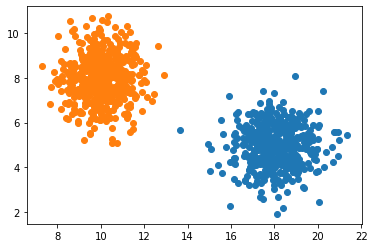

In [6]:
plt.scatter(df_1.x1, df_1.x2)
plt.scatter(df_2.x1, df_2.x2)
plt.show()

## Neural Network

### Matrik Weight

In [7]:
w11 = np.random.uniform(-0.01 ,0.01)
w12 = np.random.uniform(-0.01 ,0.01)
w21 = np.random.uniform(-0.01 ,0.01)
w22 = np.random.uniform(-0.01 ,0.01)

w = np.array([[w11, w22], [w21, w22]])
print(w)

[[ 0.00916046  0.00232335]
 [-0.00577842  0.00232335]]


### Iterasi Neural Network

In [24]:
learning_rate = 0.1

answer = []
error_array = np.zeros((2, len(df)))
for index, baris in df.iterrows() :
    w_lama = w
    input = np.array([[baris.x1], [baris.x2]])
    output_hidden = np.dot(w, input)
    output_learn = sigmoid(output_hidden)
    output_actual = np.array([[baris.y1], [baris.y2]])
    error = output_actual - output_learn
    delta_w = np.dot(learning_rate * error * output_learn * (1 - output_learn), input.T)
    w_baru = w_lama + delta_w
    w = w_baru
    
    error_array[:, index] = error.T*error.T
    
    tebakan = np.argmax(output_learn)
    jawaban = np.argmax(output_actual)
    label_tebakan = "ucup" if tebakan == 0 else "otong"
    label_jawaban = "ucup" if jawaban == 0 else "otong"
    print(f"index = {index}, tebakan = {label_tebakan}, jawaban = {label_jawaban}")
    
    if tebakan == jawaban :
        answer.append(1)
    else :
        answer.append(0)
    

index = 0, tebakan = ucup, jawaban = ucup
index = 1, tebakan = otong, jawaban = otong
index = 2, tebakan = ucup, jawaban = ucup
index = 3, tebakan = ucup, jawaban = ucup
index = 4, tebakan = otong, jawaban = otong
index = 5, tebakan = ucup, jawaban = ucup
index = 6, tebakan = otong, jawaban = otong
index = 7, tebakan = otong, jawaban = otong
index = 8, tebakan = otong, jawaban = otong
index = 9, tebakan = ucup, jawaban = ucup
index = 10, tebakan = otong, jawaban = otong
index = 11, tebakan = otong, jawaban = otong
index = 12, tebakan = otong, jawaban = otong
index = 13, tebakan = ucup, jawaban = ucup
index = 14, tebakan = ucup, jawaban = ucup
index = 15, tebakan = otong, jawaban = otong
index = 16, tebakan = otong, jawaban = otong
index = 17, tebakan = ucup, jawaban = ucup
index = 18, tebakan = ucup, jawaban = ucup
index = 19, tebakan = ucup, jawaban = ucup
index = 20, tebakan = otong, jawaban = otong
index = 21, tebakan = ucup, jawaban = ucup
index = 22, tebakan = ucup, jawaban = ucup

<module 'matplotlib.pyplot' from 'D:\\Programs\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

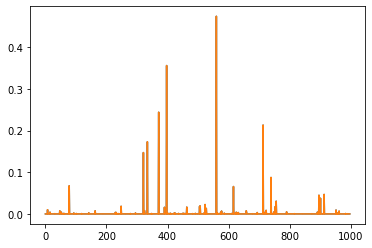

In [25]:
plt.plot(error_array.T)
plt


<module 'matplotlib.pyplot' from 'D:\\Programs\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

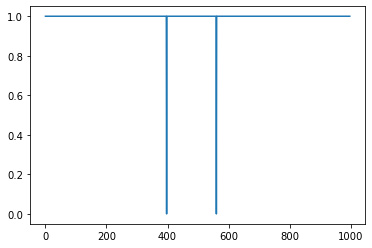

In [26]:
plt.plot(answer)
plt